# 探索数据集

将训练集的数据分为训练集和验证集，其中原始训练集的图片数量为猫狗分别10000张，验证集的图片数量为猫狗分别2500，测试集的图片有12500张。
 
删除无效图片以后，剩余9955张猫的图片用于训练，9979张狗的图片用于训练，剩余2496张猫的图片用于验证，剩余2491张狗的图片用于验证。

1. 查看数据集定义,收集猫狗分别对应的种类,作为后续筛除干扰图片的依据

In [1]:
# 数据集中狗狗种类的集合
dogs = [
 'n02085620','n02085782','n02085936','n02086079'
,'n02086240','n02086646','n02086910','n02087046'
,'n02087394','n02088094','n02088238','n02088364'
,'n02088466','n02088632','n02089078','n02089867'
,'n02089973','n02090379','n02090622','n02090721'
,'n02091032','n02091134','n02091244','n02091467'
,'n02091635','n02091831','n02092002','n02092339'
,'n02093256','n02093428','n02093647','n02093754'
,'n02093859','n02093991','n02094114','n02094258'
,'n02094433','n02095314','n02095570','n02095889'
,'n02096051','n02096177','n02096294','n02096437'
,'n02096585','n02097047','n02097130','n02097209'
,'n02097298','n02097474','n02097658','n02098105'
,'n02098286','n02098413','n02099267','n02099429'
,'n02099601','n02099712','n02099849','n02100236'
,'n02100583','n02100735','n02100877','n02101006'
,'n02101388','n02101556','n02102040','n02102177'
,'n02102318','n02102480','n02102973','n02104029'
,'n02104365','n02105056','n02105162','n02105251'
,'n02105412','n02105505','n02105641','n02105855'
,'n02106030','n02106166','n02106382','n02106550'
,'n02106662','n02107142','n02107312','n02107574'
,'n02107683','n02107908','n02108000','n02108089'
,'n02108422','n02108551','n02108915','n02109047'
,'n02109525','n02109961','n02110063','n02110185'
,'n02110341','n02110627','n02110806','n02110958'
,'n02111129','n02111277','n02111500','n02111889'
,'n02112018','n02112137','n02112350','n02112706'
,'n02113023','n02113186','n02113624','n02113712'
,'n02113799','n02113978']

# 数据集中猫种类的集合
cats=[
'n02123045','n02123159','n02123394','n02123597'
,'n02124075','n02125311','n02127052']

2. 通过keras提供的applications,筛选数据集终的异常图片.筛选依据:使用ResNet50和Xception进行预测,如果猫和狗均不出现在两个模型预测出来的标签的前30中,则判断为异常图片

In [2]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications import *
import numpy as np

# 定义ResNet50实例,并下载模型权重
model_resnet = ResNet50(weights='imagenet')

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
# from keras.applications.xception import Xception
# from keras.applications import xception.preprocess_input, xception.decode_predictions

# 定义Xception实例,并下载模型权重
model_xception = Xception(weights='imagenet')

In [4]:
from keras.applications import resnet50

# 获取训练集和验证集的路径
paths_train_cat = ['data/train/cat/cat.'+str(i+2500)+'.jpg' for i in range(10000)]
paths_train_dog = ['data/train/dog/dog.'+str(i+2500)+'.jpg' for i in range(10000)]
paths_valid_cat = ['data/valid/cat/cat.'+str(i)+'.jpg' for i in range(2500)]
paths_valid_dog = ['data/valid/dog/dog.'+str(i)+'.jpg' for i in range(2500)]

def read_img(model_type, size, path):
    """根据模型类型,得到经过处理的图片数组"""
    img = image.load_img(path, target_size=size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = model_type.preprocess_input(x)
    return x


def is_dog_or_cat(model_type, x):
    """判断该图片是不是猫狗"""
    result = []
    # 取排名前30位的预测结果
    top = 30
    flag = 0
    if model_type == xception:
        preds = model_xception.predict(x)
    elif model_type == resnet50:
        preds = model_resnet.predict(x)
    pred_decode = resnet50.decode_predictions(preds, top=top)[0]
    for i in range(top):
        if pred_decode[i][0] in dogs:
            flag = 1
        elif pred_decode[i][0] in cats:
            flag = 1
    return flag



def predict_result(model_type, size, paths):
    """根据不同的模型,批量输出不是猫狗的图片的路径"""
    result = []
    for path in paths:
        input_tensor = read_img(model_type, size, path)
        pred = is_dog_or_cat(model_type, input_tensor)
        if pred == 0:
            result.append(path)
    return result


In [5]:
# 预测并打印resnet50得到的异常图片的数量和结果
predict_resnet50 = predict_result(resnet50, (224, 224), paths_train_cat+paths_train_dog+paths_valid_cat+paths_valid_dog)

print(len(predict_resnet50))
print(predict_resnet50)


69
['data/train/cat/cat.2520.jpg', 'data/train/cat/cat.2939.jpg', 'data/train/cat/cat.3004.jpg', 'data/train/cat/cat.3216.jpg', 'data/train/cat/cat.3672.jpg', 'data/train/cat/cat.3731.jpg', 'data/train/cat/cat.4308.jpg', 'data/train/cat/cat.4338.jpg', 'data/train/cat/cat.4688.jpg', 'data/train/cat/cat.5418.jpg', 'data/train/cat/cat.5804.jpg', 'data/train/cat/cat.5818.jpg', 'data/train/cat/cat.5974.jpg', 'data/train/cat/cat.6345.jpg', 'data/train/cat/cat.6348.jpg', 'data/train/cat/cat.6463.jpg', 'data/train/cat/cat.7300.jpg', 'data/train/cat/cat.7377.jpg', 'data/train/cat/cat.7564.jpg', 'data/train/cat/cat.8118.jpg', 'data/train/cat/cat.8456.jpg', 'data/train/cat/cat.8470.jpg', 'data/train/cat/cat.8914.jpg', 'data/train/cat/cat.8921.jpg', 'data/train/cat/cat.9171.jpg', 'data/train/cat/cat.9983.jpg', 'data/train/cat/cat.10029.jpg', 'data/train/cat/cat.10365.jpg', 'data/train/cat/cat.10536.jpg', 'data/train/cat/cat.10636.jpg', 'data/train/cat/cat.10700.jpg', 'data/train/cat/cat.10712.jpg'

In [6]:
# 预测并打印xception得到的异常图片的数量和结果
predict_xception = predict_result(xception, (299, 299), paths_train_cat+paths_train_dog+paths_valid_cat+paths_valid_dog)

print(len(predict_xception))
print(predict_xception)

52
['data/train/cat/cat.2520.jpg', 'data/train/cat/cat.2939.jpg', 'data/train/cat/cat.3216.jpg', 'data/train/cat/cat.3672.jpg', 'data/train/cat/cat.4308.jpg', 'data/train/cat/cat.4338.jpg', 'data/train/cat/cat.4688.jpg', 'data/train/cat/cat.4833.jpg', 'data/train/cat/cat.5071.jpg', 'data/train/cat/cat.5351.jpg', 'data/train/cat/cat.5418.jpg', 'data/train/cat/cat.5609.jpg', 'data/train/cat/cat.5804.jpg', 'data/train/cat/cat.6590.jpg', 'data/train/cat/cat.6696.jpg', 'data/train/cat/cat.7377.jpg', 'data/train/cat/cat.7564.jpg', 'data/train/cat/cat.7682.jpg', 'data/train/cat/cat.7968.jpg', 'data/train/cat/cat.8456.jpg', 'data/train/cat/cat.8470.jpg', 'data/train/cat/cat.9171.jpg', 'data/train/cat/cat.10029.jpg', 'data/train/cat/cat.10636.jpg', 'data/train/cat/cat.10712.jpg', 'data/train/cat/cat.11184.jpg', 'data/train/cat/cat.12424.jpg', 'data/train/cat/cat.12476.jpg', 'data/train/dog/dog.2614.jpg', 'data/train/dog/dog.3889.jpg', 'data/train/dog/dog.4367.jpg', 'data/train/dog/dog.5604.jpg'

In [1]:
# 得到两个模型预测出的结果的并集
union_set = list(set(predict_resnet50).union(set(predict_xception)))

84
['data/train/cat/cat.5609.jpg', 'data/train/cat/cat.10365.jpg', 'data/train/cat/cat.7300.jpg', 'data/train/cat/cat.10712.jpg', 'data/train/dog/dog.7706.jpg', 'data/valid/dog/dog.729.jpg', 'data/train/cat/cat.12424.jpg', 'data/train/cat/cat.5804.jpg', 'data/train/dog/dog.12155.jpg', 'data/train/cat/cat.5071.jpg', 'data/train/cat/cat.6348.jpg', 'data/train/cat/cat.5974.jpg', 'data/train/cat/cat.12272.jpg', 'data/train/dog/dog.8736.jpg', 'data/valid/dog/dog.2339.jpg', 'data/train/cat/cat.10700.jpg', 'data/valid/dog/dog.1308.jpg', 'data/train/cat/cat.2520.jpg', 'data/train/dog/dog.10161.jpg', 'data/train/cat/cat.5418.jpg', 'data/train/cat/cat.4833.jpg', 'data/train/cat/cat.7564.jpg', 'data/train/dog/dog.7076.jpg', 'data/train/cat/cat.8914.jpg', 'data/train/dog/dog.3889.jpg', 'data/train/cat/cat.6696.jpg', 'data/train/cat/cat.7682.jpg', 'data/valid/dog/dog.1773.jpg', 'data/train/cat/cat.10536.jpg', 'data/train/dog/dog.9517.jpg', 'data/train/cat/cat.8118.jpg', 'data/train/cat/cat.7377.jpg

3. ResNet50预测得到69个异常图片,Xception预测得到52个异常图片,将两个异常图片集合做并集,得到84张异常数据集,将图片可视化如下,通过观察,发现其中大部分为异常图片,但有小部分为真实猫狗的图片也被包含进去,不过本文将预测出来的图片一并删除,因异常数据集的图片数量很小,对后续训练的结果几乎没有影响.

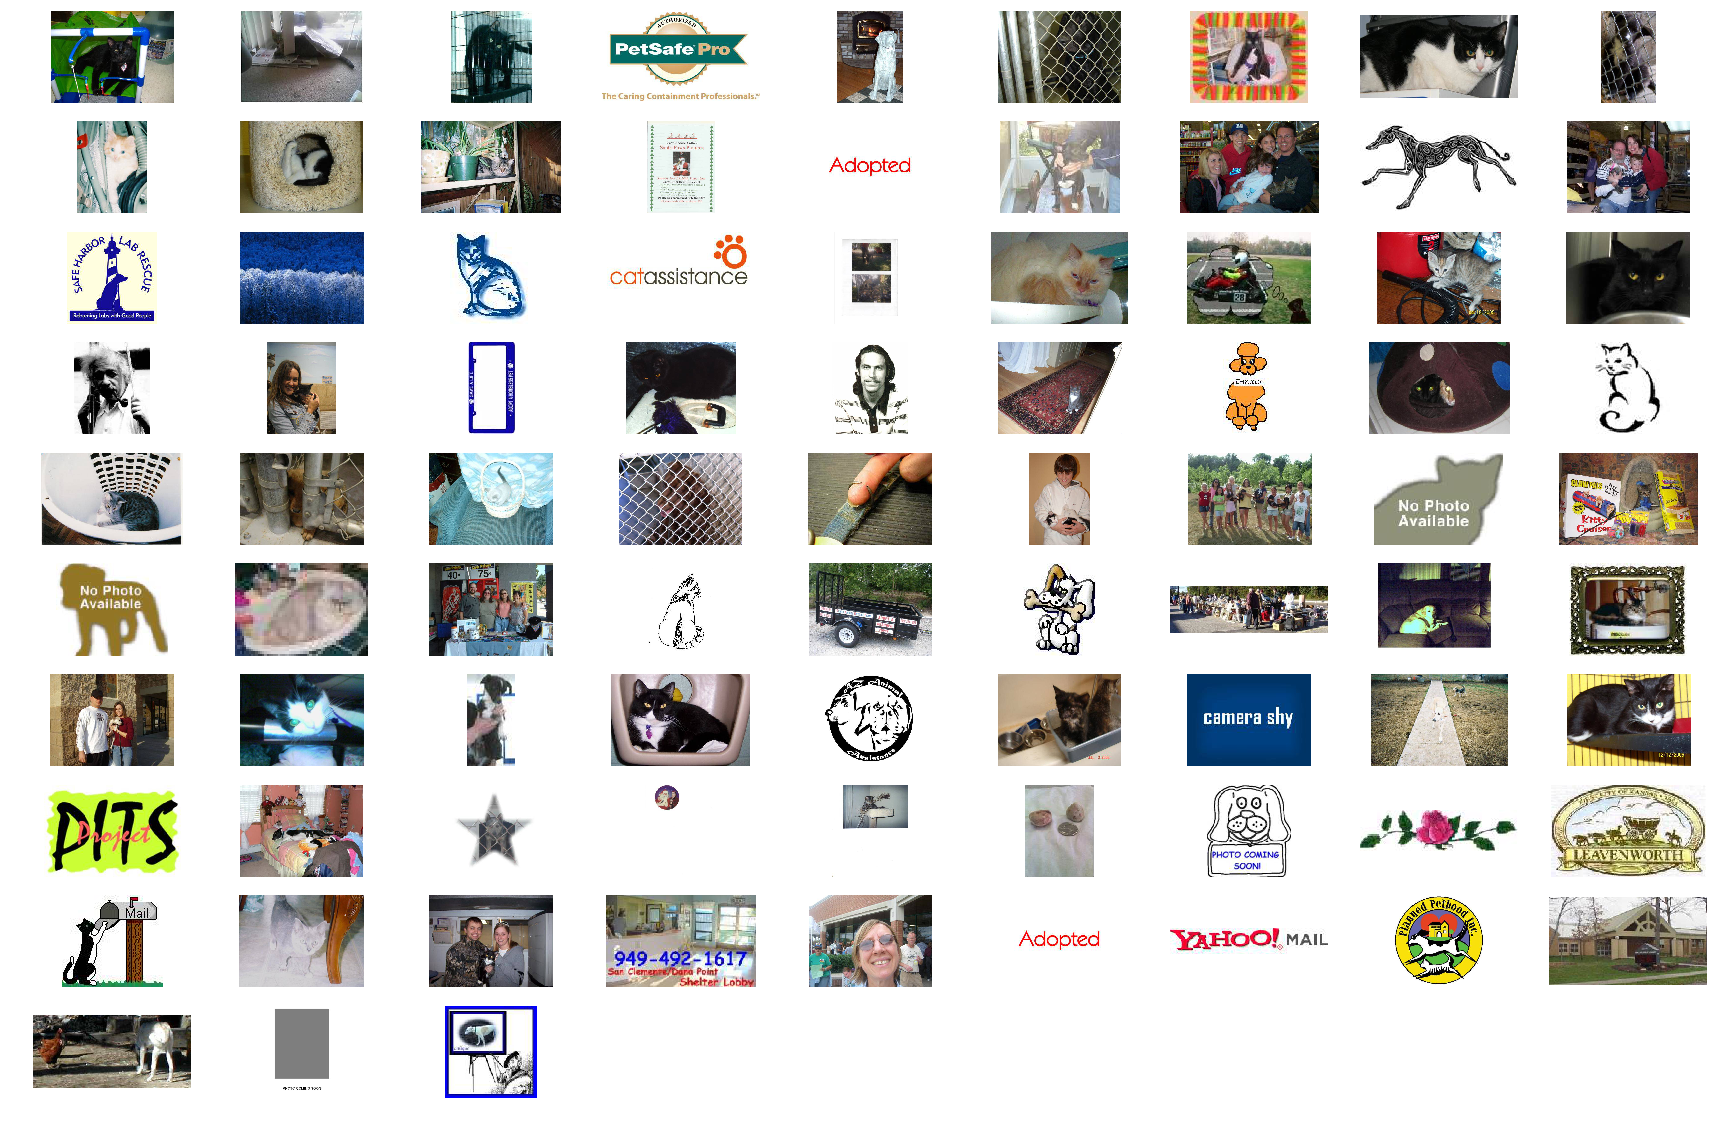

In [14]:
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, array_to_img, img_to_array

def plot_preprocessing_image(paths, figsize, rows, columns):
    """打印出异常图片"""
    plt.figure(figsize=figsize)
    count = 1
    for path in paths: 
        if count == rows * columns + 1:
            break
        img = load_img(path)
        plt.subplot(rows, columns, count)
        plt.axis('off')
        plt.imshow(img)
        count += 1
    plt.show()
plot_preprocessing_image(union_set, (30, 20), 10, 9)

4. 从原始数据集中删除异常图片

In [23]:
from keras.preprocessing import *
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

# 删除无效图片
for path in union_set:
    os.remove(path)

5. 删除异常图片后,剩余**9955**张猫的训练集图片,**9974**张狗的训练集图片,**2496**张猫的验证集图片,**2491**张狗的验证集图片

In [19]:
from keras.preprocessing import *
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

def get_filepath_filename(path):
    '''
    获得训练集、验证集、测试集的路径和文件名
    '''
    file_paths = []
    file_names = []
    for file in os.listdir(path):
        file_path = os.path.join(path, file)
        file_paths.append(file_path)
        file_names.append(file)
    return file_paths, file_names

# 猫训练集路径和文件名
train_cat_file_paths, train_cat_file_names = get_filepath_filename('data/train/cat/')

# 狗训练集路径和文件名
train_dog_file_paths, train_dog_file_names = get_filepath_filename('data/train/dog/')

# 猫验证集路径和文件名
valid_cat_file_paths, valid_cat_file_names = get_filepath_filename('data/valid/cat/')

# 狗验证集路径和文件名
valid_dog_file_paths, valid_dog_file_names = get_filepath_filename('data/valid/dog/')

# 测试集路径和文件名
test_file_paths, test_file_names = get_filepath_filename('data/test/')
print('there are %d cat pictures for training' % len(train_cat_file_names))
print('there are %d dog pictures for training' % len(train_dog_file_names))
print('there are %d cat pictures for validation' % len(valid_cat_file_names))
print('there are %d dog pictures for validation' % len(valid_dog_file_names))
print('%d pictures for testing' % len(test_file_names))

train_label = np.array([0] * len(train_cat_file_names) + [1] * len(train_dog_file_names))
valid_label = np.array([0] * len(valid_cat_file_names) + [1] * len(valid_dog_file_names))

there are 9955 cat pictures for training
there are 9974 dog pictures for training
there are 2496 cat pictures for validation
there are 2491 dog pictures for validation
12500 pictures for testing


### 可视化训练图片和测试图片长宽分布

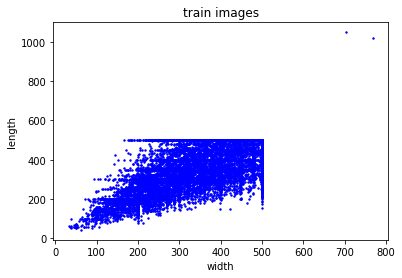

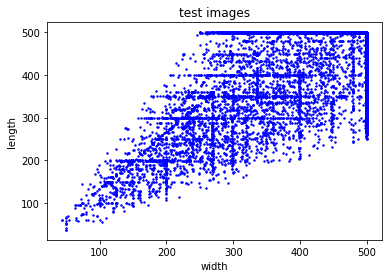

In [11]:
import matplotlib.pyplot as plt
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, array_to_img, img_to_array

def width_length(paths):
    '''获得图片的宽度和长度'''
    count = 0
    width_all = []
    length_all = []
    df = pd.DataFrame(columns=['width', 'length'])
    for path in paths:
        img = load_img(path)
        image = img_to_array(img)
        width = image.shape[0]
        length = image.shape[1]
        width_all.append(width)
        length_all.append(length)
    df['width'] = width_all
    df['length'] = length_all
    return df

def plot_scatter(df, text):
    '''画出图片长宽的分布直方图'''
    plt.scatter(df['width'], df['length'], c='b', s=2)
    plt.title(text)
    plt.xlabel('width')
    plt.ylabel('length')
    plt.show()
    
# 获得训练集图片和测试集图片的长宽数组    
train_width_length = width_length(train_cat_file_paths+train_dog_file_paths+valid_cat_file_paths+valid_dog_file_paths)
test_width_length = width_length(test_file_paths)


# 画出训练集图片的长宽分布直方图
plot_scatter(train_width_length, 'train images')

# 画出测试集图片的长宽分布直方图
plot_scatter(test_width_length, 'test images')

# 创建图片生成器

通过ImageDataGenerator的方式创建图片生成器。

1.	rotation_range=40，随机旋转40度
2.	width_shift_range=0.2，随机水平移动占总宽度的20%
3.	height_shift_range=0.2，随机垂直移动占总宽度的20%
4.	将图像的像素值归一化到-1-1的范围内
5.	shear_range=0.2，剪切强度为0.2
6.	zoom_range=0.2，随机缩放范围为0.2
7.	horizontal_flip=True，随机进行水平翻转
8.	fill_mode='nearest'，边界以外的点根据nearest的方式填充‘aaaaaaaa|abcd|dddddddd’

In [20]:
from keras.applications import *


def Xception_preprocess_input(x):
    x = xception.preprocess_input(x)
    return x

def InceptionResNetV2_preprocess_input(x):
    x = inception_resnet_v2.preprocess_input(x)
    return x
def data(model_type, image_width, image_length, enhence=True):
    train_batch_size = 64
    val_batch_size = 16
    if enhence:
        if model_type == 'Xception':
            # 创建图片生成器
            train_datagen = ImageDataGenerator(rotation_range=40,
                                         width_shift_range=0.2,
                                         height_shift_range=.2,
                                        preprocessing_function=Xception_preprocess_input,
                                         shear_range=0.2,
                                         zoom_range=0.2,
                                         horizontal_flip=True,
                                         fill_mode='nearest')
        elif model_type == 'InceptionResNetV2':
            train_datagen = ImageDataGenerator(rotation_range=40,
                                         width_shift_range=0.2,
                                         height_shift_range=.2,
                                        preprocessing_function=InceptionResNetV2_preprocess_input,
                                         shear_range=0.2,
                                         zoom_range=0.2,
                                         horizontal_flip=True,
                                         fill_mode='nearest')
    else:
        if model_type == 'Xception':
            # 创建图片生成器
            train_datagen = ImageDataGenerator(preprocessing_function=Xception_preprocess_input)
        elif model_type == 'InceptionResNetV2':
            train_datagen = ImageDataGenerator(preprocessing_function=InceptionResNetV2_preprocess_input)

    # 训练集的图片生成器
    train_gen = train_datagen.flow_from_directory(directory='data/train/',
                                                  target_size=(image_width,image_length),
                                                  batch_size=train_batch_size,
                                                  class_mode='binary')

    # 验证集的图片生成器
    val_gen = train_datagen.flow_from_directory(directory='data/valid/',
                                                  target_size=(image_width,image_length),
                                                  batch_size=val_batch_size,
                                                class_mode='binary')
    return train_gen, val_gen

# 可视化数据增强后的图片

通过该方法，可以随机地对一张图片进行实时图片增强（每张图片仅执行随机的一种变换）

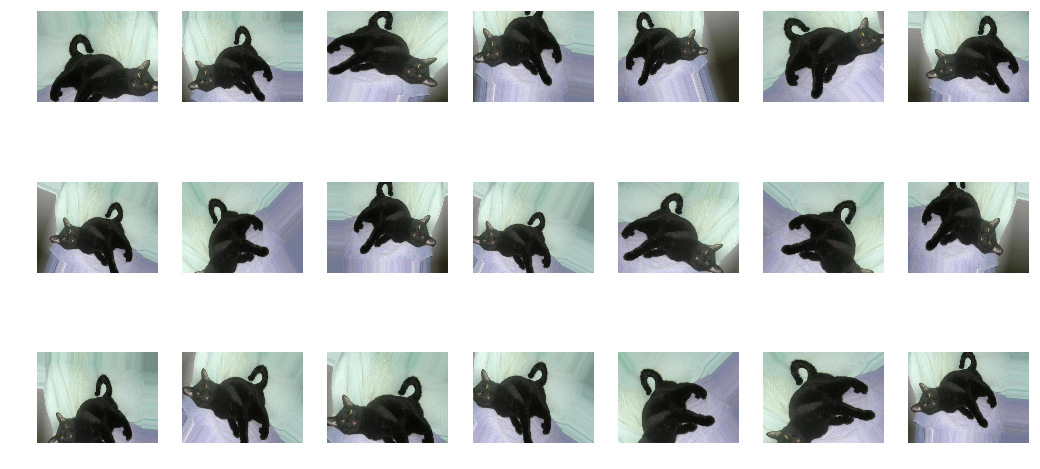

In [11]:
# 从训练集中加载一张图片
img = load_img('data/train/cat/cat.2612.jpg')
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

# 用该图片生成21张图像增强后的图片
i = 0
for batch in train_datagen.flow(x, batch_size=1, 
                                save_to_dir='preview', save_prefix = 'cat', save_format = 'jpeg'):
    i += 1
    if i > 20:
        break

# 将获得的图片保存到‘preview’的文件夹中，并显示
file_paths, file_names = get_filepath_filename('preview/')

plt.figure(figsize=(16,8),dpi=80)
x = np.arange(0,100,0.1)
y = x * 2
del_lisename = file_paths[1:]
for i in range(len(del_lisename)):
    img = load_img(del_lisename[i])
    img_array = img_to_array(img)

    plt.subplot(3,7,i+1)
    plt.axis('off')
    plt.imshow(img)
plt.show()        

# 创建模型

![image](fine_tune.png)

选择迁移学习的方法进行模型搭建，该项目将比较Xception和InceptionResNetV2的效果。其中，由于兼顾到模型的大小，故选择Xception模型，开放卷积层进行训练，比较以上4种情况下的得分情况，从而选择最终采用的模型。

In [21]:
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import GlobalAveragePooling2D, Dense, Dropout
from keras.models import Model
from keras.optimizers import Adagrad
from keras.applications.xception import Xception, preprocess_input
from keras.callbacks import EarlyStopping
from keras import regularizers
def create_model(model_type, dropout_rate, regularizer_rate):
    # 创建Xception和InceptionResNetV2模型，去掉顶层输出层，加载预训练的权重
    base_model = model_type(include_top=False, weights='imagenet')

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    if regularizer_rate:
        x = Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(regularizer_rate))(x)
    else:
        x = Dense(1024, activation='relu')(x)
    if dropout_rate:
        x = Dropout(dropout_rate)(x)
    predictions = Dense(1, activation='sigmoid')(x)
    model = Model(input=base_model.input, output=predictions)
    # model.summary()
    return model, base_model

# 创建模型实例
Xception_model, Xception_base_model = create_model(Xception, 0.6, 0.01)
Xception_model_no_dropout, Xception_base_model_no_dropout = create_model(Xception, 0, 0.01)
Xception_model_no_regulazed, Xception_base_model_no_regulazed = create_model(Xception, 0.6, 0)
InceptionResNetV2_model, InceptionResNetV2_base_model = create_model(InceptionResNetV2, 0.6, 0.01)

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:21: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


# 设置训练过程中的可视化参数

1. 设置训练模式，设置需要训练的层的数量
2. 记录训练过程中的 `train loss` / `valid loss` / ` train acc ` / `valid acc`
3. 设置早期停止，当`valid loss`不再下降时，保存模型的参数
4. 编译模型时，选择优化器为adam，评价指标为accuracy。由于为二分类问题，故选择binary_crossentropy

In [22]:
import time
from keras.callbacks import Callback, ModelCheckpoint
from keras.callbacks import TensorBoard

def setup_to_transfer_learning(model,base_model, closed_layers):
    '''
    规定开放的层的数量，并编译模型
    '''
    if closed_layers:
        for layer in base_model.layers[:closed_layers]:
            layer.trainable = False
    else:
        for layer in base_model.layers:
            layer.trainable = False
    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])



# 重写callback类，使之能记录过程中的loss和accuracy
class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch': [], 'epoch': []}
        self.accuracy = {'batch': [], 'epoch': []}
        self.val_loss = {'batch': [], 'epoch': []}
        self.val_acc = {'batch': [], 'epoch': []}

    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('acc'))
        self.val_loss['batch'].append(logs.get('val_loss'))
        self.val_acc['batch'].append(logs.get('val_acc'))

    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('acc'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
        self.val_acc['epoch'].append(logs.get('val_acc'))

# 固定Xception和InceptionResNetV2模型所有层的权重
setup_to_transfer_learning(Xception_model,Xception_base_model, 0)
setup_to_transfer_learning(InceptionResNetV2_model,InceptionResNetV2_base_model, 0)

# 保存最优参数模型
Xception_checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.Xception.hdf5', 
                               verbose=1, save_best_only=True)

InceptionResNetV2_checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.InceptionResNetV2.hdf5', 
                               verbose=1, save_best_only=True)

# multi_checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.multi.hdf5', 
#                                verbose=1, save_best_only=True)

Xception_tuned_checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.Xception_tuned.hdf5', 
                               verbose=1, save_best_only=True)

Xception_no_dropout_checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.Xception_no_dropout.hdf5', 
                               verbose=1, save_best_only=True)

Xception_no_regulazed_checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.Xception_no_regulazed.hdf5', 
                               verbose=1, save_best_only=True)

Xception_no_earlystop_checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.Xception_no_earlystop.hdf5', 
                               verbose=1)

Xception_no_enhence_checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.Xception_no_enhence.hdf5', 
                               verbose=1, save_best_only=True)
# 创建history实例
history = LossHistory()


In [23]:
def plot_loss(history):
    '''
    绘制训练过程的loss曲线
    '''
    iters = range(len(history.losses['epoch']))
    plt.figure()
    plt.plot(iters, history.losses['epoch'], 'b', label='train loss')
    plt.plot(iters, history.val_loss['epoch'], 'r', label='val loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(loc='upper right')
    plt.title('Training and validation loss')
    plt.grid(True)
    plt.show()

def plot_acc(history):
    '''
    绘制训练过程中的accuracy曲线
    '''
    iters = range(len(history.losses['epoch']))
    plt.figure()
    plt.plot(iters, history.accuracy['epoch'], 'b', label='train acc')
    plt.plot(iters, history.val_acc['epoch'], 'r', label='val acc')
    plt.xlabel('epoch')
    plt.ylabel('acc')
    plt.ylim((0, 1))
    plt.legend(loc='lower right')
    plt.title('Training and validation accuracy')
    plt.grid(True)
    plt.show()

# 训练模型

分别训练4个模型：

1. Xception模型

2. InceptionResNetV2模型

3. 训练开放特定层的xception模型

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
random.seed(2018)

def train(model_type, train_gen, val_gen, checkpointer, earlystopping=True):
    '''定义训练函数，并报告训练时间'''
    steps_per_epoch = 32
    epochs = 9
    # 记录初始时间
    time0 = time.time()
    
    if earlystopping:
        history_tf = model_type.fit_generator(train_gen, 
                                         steps_per_epoch=steps_per_epoch, 
                                         epochs=epochs, 
                                         validation_data=val_gen,
                                         validation_steps=steps_per_epoch,callbacks=[EarlyStopping(patience=3), 
                                                                        checkpointer,
                                                                       history])
    else:
        history_tf = model_type.fit_generator(train_gen, 
                                         steps_per_epoch=steps_per_epoch, 
                                         epochs=epochs, 
                                         validation_data=val_gen,
                                         validation_steps=steps_per_epoch,callbacks=[checkpointer,
                                                                       history])
    print('training time is %d s' % (time.time()-time0))

### 训练Xception模型

训练结束后，模型的训练集loss：0.3041，acc: 0.9399，验证集val_loss: 0.2005， val_acc: 0.9844。训练花费时间536秒（AWS服务器P2.xlarge）

Found 19929 images belonging to 2 classes.
Found 4987 images belonging to 2 classes.
Epoch 1/9
32/32 [==============================] - 64s 2s/step - loss: 7.1936 - acc: 0.9302 - val_loss: 2.3366 - val_acc: 0.9844

Epoch 00001: val_loss improved from inf to 2.33658, saving model to saved_models/weights.best.Xception.hdf5
Epoch 2/9
32/32 [==============================] - 53s 2s/step - loss: 1.2019 - acc: 0.9546 - val_loss: 0.4902 - val_acc: 0.9863

Epoch 00002: val_loss improved from 2.33658 to 0.49015, saving model to saved_models/weights.best.Xception.hdf5
Epoch 3/9
32/32 [==============================] - 52s 2s/step - loss: 0.3657 - acc: 0.9678 - val_loss: 0.2567 - val_acc: 0.9785

Epoch 00003: val_loss improved from 0.49015 to 0.25669, saving model to saved_models/weights.best.Xception.hdf5
Epoch 4/9
32/32 [==============================] - 53s 2s/step - loss: 0.2392 - acc: 0.9644 - val_loss: 0.2361 - val_acc: 0.9609

Epoch 00004: val_loss improved from 0.25669 to 0.23606, saving 

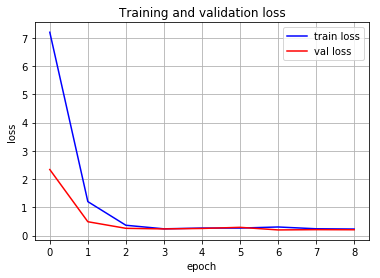

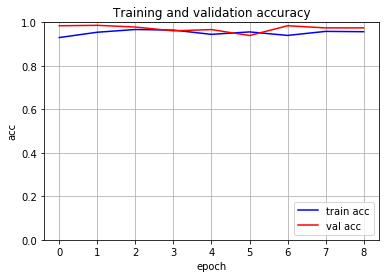

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
random.seed(2018)
Xception_train_gen, Xception_val_gen = data('Xception', 299, 299)

def train(model_type, train_gen, val_gen, checkpointer):
    steps_per_epoch = 32
    epochs = 9
    # 记录初始时间
    time0 = time.time()

    history_tf = model_type.fit_generator(train_gen, 
                                     steps_per_epoch=steps_per_epoch, 
                                     epochs=epochs, 
                                     validation_data=val_gen,
                                     validation_steps=steps_per_epoch,callbacks=[EarlyStopping(patience=3), 
                                                                    checkpointer,
                                                                   history])

    # 记录训练所花费的时间
    print('training time is %d s' % (time.time()-time0))
train(Xception_model, Xception_train_gen, Xception_val_gen, Xception_checkpointer)
plot_loss(history)
plot_acc(history)


### 训练InceptionResNetV2模型

训练结束后，模型的训练集loss：0.3588，acc: 0.9258，验证集val_loss: 0.1961， val_acc: 0.9883。训练花费时间909秒（AWS服务器P2.xlarge）

Found 19929 images belonging to 2 classes.
Found 4987 images belonging to 2 classes.
Epoch 1/9
32/32 [==============================] - 83s 3s/step - loss: 7.0045 - acc: 0.9175 - val_loss: 2.7536 - val_acc: 0.9492

Epoch 00001: val_loss improved from inf to 2.75364, saving model to saved_models/weights.best.InceptionResNetV2.hdf5
Epoch 2/9
32/32 [==============================] - 67s 2s/step - loss: 1.6184 - acc: 0.9272 - val_loss: 0.8689 - val_acc: 0.9551

Epoch 00002: val_loss improved from 2.75364 to 0.86893, saving model to saved_models/weights.best.InceptionResNetV2.hdf5
Epoch 3/9
32/32 [==============================] - 67s 2s/step - loss: 0.6472 - acc: 0.9414 - val_loss: 0.5546 - val_acc: 0.9238

Epoch 00003: val_loss improved from 0.86893 to 0.55463, saving model to saved_models/weights.best.InceptionResNetV2.hdf5
Epoch 4/9
32/32 [==============================] - 68s 2s/step - loss: 0.3856 - acc: 0.9468 - val_loss: 0.2369 - val_acc: 0.9824

Epoch 00004: val_loss improved from 

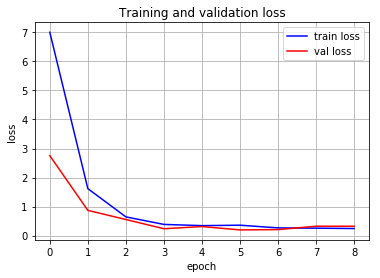

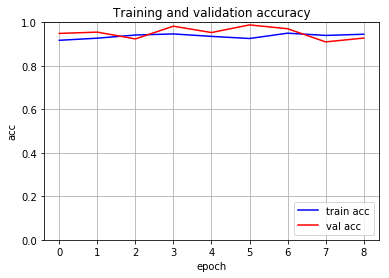

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
random.seed(2018)
InceptionResNetV2_train_gen, InceptionResNetV2_val_gen = data('InceptionResNetV2', 299, 299)
train(InceptionResNetV2_model, InceptionResNetV2_train_gen, InceptionResNetV2_val_gen, InceptionResNetV2_checkpointer)
plot_loss(history)
plot_acc(history)

### 训练开放特定层的xception模型

xception一共有126层，其中将前110层固定，其余层参与训练。训练结束后，模型的训练集loss：0.0632，acc: 0.9849，验证集val_loss: 0.0651， val_acc: 0.9824。训练花费时间733秒（AWS服务器P2.xlarge）

Found 19929 images belonging to 2 classes.
Found 4987 images belonging to 2 classes.
Epoch 1/9
32/32 [==============================] - 171s 5s/step - loss: 6.4773 - acc: 0.9575 - val_loss: 1.4022 - val_acc: 0.9863

Epoch 00001: val_loss improved from inf to 1.40224, saving model to saved_models/weights.best.Xception.hdf5
Epoch 2/9
32/32 [==============================] - 62s 2s/step - loss: 0.4951 - acc: 0.9736 - val_loss: 0.1209 - val_acc: 0.9824

Epoch 00002: val_loss improved from 1.40224 to 0.12092, saving model to saved_models/weights.best.Xception.hdf5
Epoch 3/9
32/32 [==============================] - 63s 2s/step - loss: 0.0931 - acc: 0.9797 - val_loss: 0.1101 - val_acc: 0.9727

Epoch 00003: val_loss improved from 0.12092 to 0.11009, saving model to saved_models/weights.best.Xception.hdf5
Epoch 4/9
32/32 [==============================] - 62s 2s/step - loss: 0.0799 - acc: 0.9790 - val_loss: 0.1069 - val_acc: 0.9688

Epoch 00004: val_loss improved from 0.11009 to 0.10688, saving

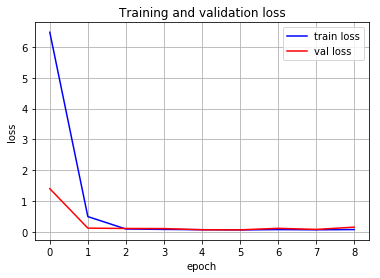

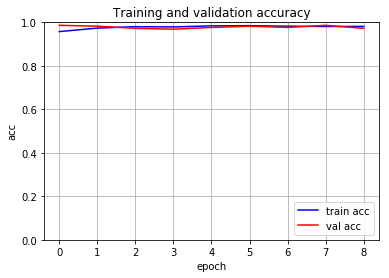

In [7]:
setup_to_transfer_learning(Xception_model,Xception_base_model, 110)
Xception_train_gen, Xception_val_gen = data('Xception', 299, 299)
train(Xception_model, Xception_train_gen, Xception_val_gen, Xception_tuned_checkpointer)
plot_loss(history)
plot_acc(history)

### 训练开放特定层的xception模型(无dropout)

xception一共有126层，其中将前110层固定，其余层参与训练,使用所有过拟合技术但不包括dropout。训练结束后，模型的训练集loss：0.0762，acc: 0.9790，验证集val_loss: 0.0498， val_acc: 0.9922。训练花费时间758秒（AWS服务器P2.xlarge）

Found 19929 images belonging to 2 classes.
Found 4987 images belonging to 2 classes.
Epoch 1/9
32/32 [==============================] - 150s 5s/step - loss: 7.0689 - acc: 0.9302 - val_loss: 1.9092 - val_acc: 0.9863

Epoch 00001: val_loss improved from inf to 1.90920, saving model to saved_models/weights.best.Xception_no_dropout.hdf5
Epoch 2/9
32/32 [==============================] - 63s 2s/step - loss: 0.7107 - acc: 0.9858 - val_loss: 0.1750 - val_acc: 0.9902

Epoch 00002: val_loss improved from 1.90920 to 0.17495, saving model to saved_models/weights.best.Xception_no_dropout.hdf5
Epoch 3/9
32/32 [==============================] - 63s 2s/step - loss: 0.1189 - acc: 0.9741 - val_loss: 0.1023 - val_acc: 0.9824

Epoch 00003: val_loss improved from 0.17495 to 0.10232, saving model to saved_models/weights.best.Xception_no_dropout.hdf5
Epoch 4/9
32/32 [==============================] - 63s 2s/step - loss: 0.0798 - acc: 0.9775 - val_loss: 0.0735 - val_acc: 0.9824

Epoch 00004: val_loss improve

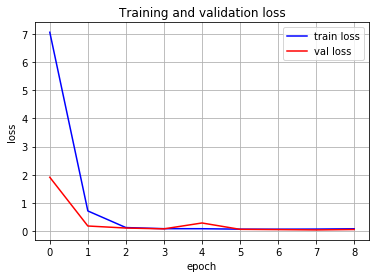

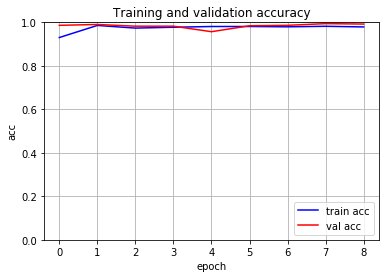

In [12]:
setup_to_transfer_learning(Xception_model_no_dropout,Xception_base_model_no_dropout, 110)
Xception_train_gen_no_dropout, Xception_val_gen_no_dropout = data('Xception', 299, 299)
train(Xception_model_no_dropout, Xception_train_gen_no_dropout, Xception_val_gen_no_dropout, Xception_no_dropout_checkpointer)
plot_loss(history)
plot_acc(history)

### 训练开放特定层的xception模型(无正则化)

xception一共有126层，其中将前110层固定，其余层参与训练,使用所有过拟合技术但不包括正则化。训练结束后，模型的训练集loss： 0.0540，acc:  0.9795 ，验证集val_loss: 0.0529， val_acc:  0.9844。训练花费时间543秒（AWS服务器P2.xlarge）

Found 19929 images belonging to 2 classes.
Found 4987 images belonging to 2 classes.
Epoch 1/9
32/32 [==============================] - 78s 2s/step - loss: 0.1435 - acc: 0.9336 - val_loss: 0.2810 - val_acc: 0.9277

Epoch 00001: val_loss improved from inf to 0.28100, saving model to saved_models/weights.best.Xception_no_regulazed.hdf5
Epoch 2/9
32/32 [==============================] - 62s 2s/step - loss: 0.0568 - acc: 0.9771 - val_loss: 0.1035 - val_acc: 0.9844

Epoch 00002: val_loss improved from 0.28100 to 0.10350, saving model to saved_models/weights.best.Xception_no_regulazed.hdf5
Epoch 3/9
32/32 [==============================] - 63s 2s/step - loss: 0.0793 - acc: 0.9741 - val_loss: 0.0810 - val_acc: 0.9824

Epoch 00003: val_loss improved from 0.10350 to 0.08100, saving model to saved_models/weights.best.Xception_no_regulazed.hdf5
Epoch 4/9
32/32 [==============================] - 63s 2s/step - loss: 0.0540 - acc: 0.9795 - val_loss: 0.0529 - val_acc: 0.9844

Epoch 00004: val_loss im

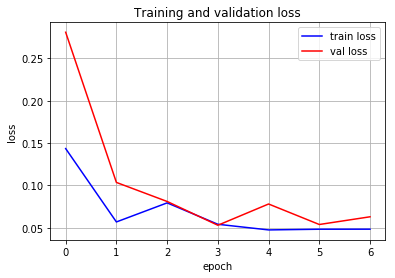

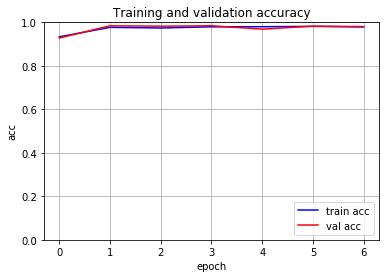

In [17]:
setup_to_transfer_learning(Xception_model_no_regulazed,Xception_base_model_no_regulazed, 110)
Xception_train_gen_no_regulazed, Xception_val_gen_no_regulazed = data('Xception', 299, 299)
train(Xception_model_no_regulazed, Xception_train_gen_no_regulazed, Xception_val_gen_no_regulazed, Xception_no_regulazed_checkpointer)
plot_loss(history)
plot_acc(history)

### 训练开放特定层的xception模型(无早期停止)

xception一共有126层，其中将前110层固定，其余层参与训练,使用所有过拟合技术但不包括早期停止。训练结束后，模型的训练集loss：0.0860，acc: 0.9780，验证集val_loss:0.0984 ， val_acc:  0.9922。训练花费时间585秒（AWS服务器P2.xlarge）

Found 19929 images belonging to 2 classes.
Found 4987 images belonging to 2 classes.
Epoch 1/9
32/32 [==============================] - 66s 2s/step - loss: 5.8268 - acc: 0.9795 - val_loss: 0.9498 - val_acc: 0.9922

Epoch 00001: saving model to saved_models/weights.best.Xception_no_earlystop.hdf5
Epoch 2/9
32/32 [==============================] - 52s 2s/step - loss: 0.3182 - acc: 0.9810 - val_loss: 0.0802 - val_acc: 0.9902

Epoch 00002: saving model to saved_models/weights.best.Xception_no_earlystop.hdf5
Epoch 3/9
32/32 [==============================] - 52s 2s/step - loss: 0.0870 - acc: 0.9785 - val_loss: 0.0572 - val_acc: 0.9883

Epoch 00003: saving model to saved_models/weights.best.Xception_no_earlystop.hdf5
Epoch 4/9
32/32 [==============================] - 53s 2s/step - loss: 0.0821 - acc: 0.9800 - val_loss: 0.0620 - val_acc: 0.9824

Epoch 00004: saving model to saved_models/weights.best.Xception_no_earlystop.hdf5
Epoch 5/9
32/32 [==============================] - 53s 2s/step - lo

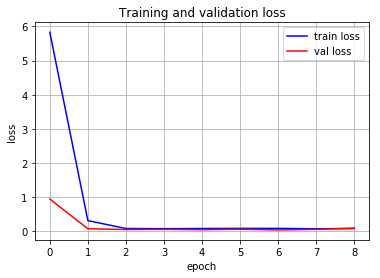

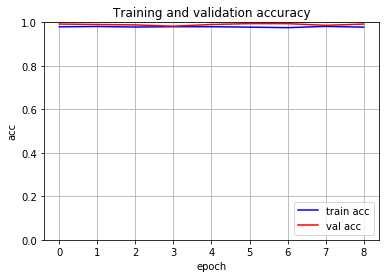

In [22]:
setup_to_transfer_learning(Xception_model,Xception_base_model, 110)
Xception_train_gen, Xception_val_gen = data('Xception', 299, 299)
train(Xception_model, Xception_train_gen, Xception_val_gen, Xception_no_earlystop_checkpointer)
plot_loss(history)
plot_acc(history)

### 训练开放特定层的xception模型(无图片增强)

xception一共有126层，其中将前110层固定，其余层参与训练,使用所有过拟合技术但不包括图片增强。训练结束后，模型的训练集loss：0.1940，acc:  0.9761，验证集val_loss:0.1797 ， val_acc:  0.9863。训练花费时间442秒（AWS服务器P2.xlarge）

Found 19929 images belonging to 2 classes.
Found 4987 images belonging to 2 classes.
Epoch 1/9
32/32 [==============================] - 64s 2s/step - loss: 6.8864 - acc: 0.9443 - val_loss: 1.9184 - val_acc: 0.9805

Epoch 00001: val_loss improved from inf to 1.91839, saving model to saved_models/weights.best.Xception_no_enhence.hdf5
Epoch 2/9
32/32 [==============================] - 52s 2s/step - loss: 0.8673 - acc: 0.9736 - val_loss: 0.3137 - val_acc: 0.9902

Epoch 00002: val_loss improved from 1.91839 to 0.31368, saving model to saved_models/weights.best.Xception_no_enhence.hdf5
Epoch 3/9
32/32 [==============================] - 51s 2s/step - loss: 0.2496 - acc: 0.9746 - val_loss: 0.2075 - val_acc: 0.9844

Epoch 00003: val_loss improved from 0.31368 to 0.20750, saving model to saved_models/weights.best.Xception_no_enhence.hdf5
Epoch 4/9
32/32 [==============================] - 52s 2s/step - loss: 0.1940 - acc: 0.9761 - val_loss: 0.1797 - val_acc: 0.9863

Epoch 00004: val_loss improved

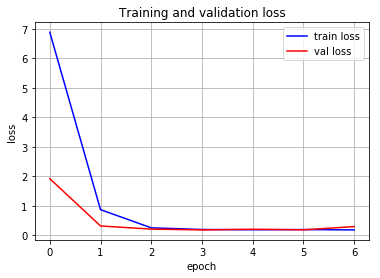

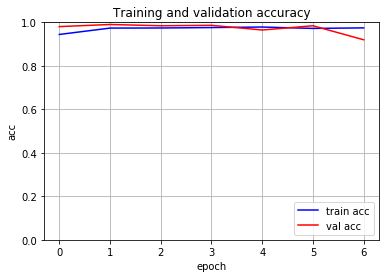

In [25]:
setup_to_transfer_learning(Xception_model,Xception_base_model, 110)
Xception_train_gen, Xception_val_gen = data('Xception', 299, 299, enhence=False)
train(Xception_model, Xception_train_gen, Xception_val_gen, Xception_no_enhence_checkpointer)
plot_loss(history)
plot_acc(history)

# 预测测试集


In [7]:
from keras.preprocessing import image                  
from tqdm import tqdm
import os
import pandas as pd



def path_to_tensor(img_path, model_type):
    # 将图片转化为可以输入模型的数组
    img = image.load_img(img_path, target_size=(299, 299))
    x = image.img_to_array(img)
    if model_type == 'Xception':
        x = Xception_preprocess_input(x)
    elif model_type == 'InceptionResNetV2':
        x = InceptionResNetV2_preprocess_input(x)
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths, model_type):
    '''
    批量转化图片
    '''
    list_of_tensors = [path_to_tensor(img_path, model_type) for img_path in (img_paths)]
    return np.vstack(list_of_tensors)

# 获取图片路径
path = ['data/test/'+str(i+1)+'.jpg' for i in range(len(test_file_names))]



In [18]:
# 预测Xception的结果
Xception_test_tensor = paths_to_tensor(path, 'Xception')
Xception_model.load_weights('saved_models/weights.best.Xception.hdf5')
Xception_pred_test = Xception_model.predict(Xception_test_tensor, verbose=1)

12500/12500 [==============================] - 298s 24ms/step


In [23]:
# 预测InceptionResNetV2的结果
InceptionResNetV2_test_tensor = paths_to_tensor(path, 'InceptionResNetV2')
InceptionResNetV2_model.load_weights('saved_models/weights.best.InceptionResNetV2.hdf5')
InceptionResNetV2_pred_test = InceptionResNetV2_model.predict(InceptionResNetV2_test_tensor, verbose=1)

12500/12500 [==============================] - 366s 29ms/step


In [9]:
# 预测开放特定层的Xception的结果
Xception_tuned_test_tensor = paths_to_tensor(path, 'Xception')
Xception_model.load_weights('saved_models/weights.best.Xception_tuned.hdf5')
Xception_tuned_pred_test = Xception_model.predict(Xception_tuned_test_tensor, verbose=1)

12500/12500 [==============================] - 306s 25ms/step


In [14]:
# 预测开放特定层的没有使用dropout的Xception的结果
Xception_no_dropout_test_tensor = paths_to_tensor(path, 'Xception')
Xception_model.load_weights('saved_models/weights.best.Xception_no_dropout.hdf5')
Xception_no_dropout_pred_test = Xception_model.predict(Xception_no_dropout_test_tensor, verbose=1)

12500/12500 [==============================] - 305s 24ms/step


In [18]:
# 预测开放特定层的没有使用正则化的Xception的结果
Xception_no_regulazed_test_tensor = paths_to_tensor(path, 'Xception')
Xception_model.load_weights('saved_models/weights.best.Xception_no_regulazed.hdf5')
Xception_no_regulazed_pred_test = Xception_model.predict(Xception_no_regulazed_test_tensor, verbose=1)

12500/12500 [==============================] - 303s 24ms/step


In [23]:
# 预测开放特定层的没有使用早期停止的Xception的结果
Xception_no_earlystop_test_tensor = paths_to_tensor(path, 'Xception')
Xception_model.load_weights('saved_models/weights.best.Xception_no_earlystop.hdf5')
Xception_no_earlystop_pred_test = Xception_model.predict(Xception_no_earlystop_test_tensor, verbose=1)

12500/12500 [==============================] - 307s 25ms/step


In [10]:
# 预测开放特定层的没有使用图片增强的Xception的结果
Xception_no_enhence_test_tensor = paths_to_tensor(path, 'Xception')
Xception_model.load_weights('saved_models/weights.best.Xception_no_regulazed.hdf5')
Xception_no_enhence_pred_test = Xception_model.predict(Xception_no_enhence_test_tensor, verbose=1)

12500/12500 [==============================] - 304s 24ms/step


# 保存提交结果
kaggle平台要求提供原始的预测概率数据，故将结果保存为csv格式文件

In [11]:
def round_data(data):
    return round(data, 4)
# 结果转换为DataFrame的格式，保存在result/Result.csv中
def submission(pred_test):
    test_result = pd.DataFrame(pred_test.clip(min=0.005, max=0.995), index=range(1, len(pred_test)+1), columns=['label'])
    os.getcwd()
    test_result.index.name = 'id'
    test_result_round = test_result.apply(round_data)
    test_result_round.to_csv('result/submission.csv')
    return test_result
#submission(Xception_pred_test)
#submission(InceptionResNetV2_pred_test)
#submission(multi_pred_test)
# test_result = submission(Xception_tuned_pred_test)
# test_result = submission(Xception_no_dropout_pred_test)
# test_result = submission(Xception_no_regulazed_pred_test)
# test_result = submission(Xception_no_earlystop_pred_test)
test_result = submission(Xception_no_enhence_pred_test)

# log loss
kaggle通过计算log loss的得分进行排名，

根据项目需要，得分至少达到**0.06127**，四个模型分别为：

1. Xception：0.6127
2. InceptionResNetV2：0.04347
3. **开放特定层并使用了防过拟合手段的的Xception：0.04273**
4. 开放特定层但没有使用dropout的Xception: 0.04763
5. 开放特定层但没有使用正则化的Xception: 0.05039
6. 开放特定层但没有使用早期停止的Xception: 0.04854
7. 开放特定层但没有使用图片增强的Xception: 0.04719

# 可视化结果

通过可视化测试集的预测结果，可以看到预测的结果正确

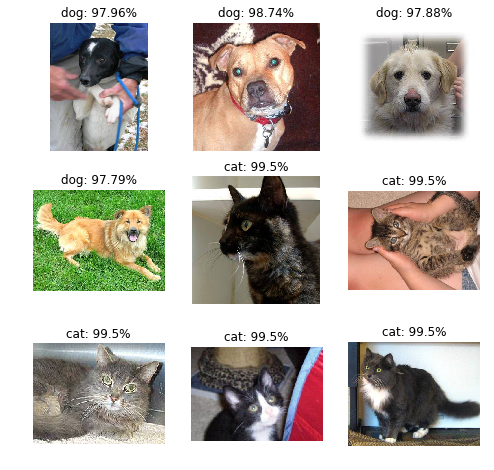

In [21]:
# 将结果保留4位小数
def round_data(data):
    return round(data, 4)

test_result_round = test_result.apply(round_data)
# print(test_result_round.head)

def plot_result(num, n_rows, n_columns, test_result):
    '''
    可视化预测结果
    '''
    path = ['data/test/' + str(i+1) + '.jpg' for i in range(num)]
    plt.figure(figsize=(8, 8))
    for i in range(num):
        img = image.load_img(path[i])
        img_array = image.img_to_array(img)
        plt.subplot(n_rows, n_columns, i+1)
        plt.imshow(img)
        plt.axis('off')
        if test_result['label'][i+1] < 0.5:
            name = 'cat'
            title = name + ': ' + str(round(1 - test_result['label'][i+1], 4)*100) + '%'
        else:
            name = 'dog'
            title = name + ': ' + str(round(test_result['label'][i+1], 4)*100) + '%'
        plt.title(title)
    plt.show()
plot_result(9, 3, 3, test_result)